<a href="https://colab.research.google.com/github/akibmir90/Machine-Learning-Deep-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Using Supervised Machine Learning
#### Following prediction exercise will be dealt with simple linear regression as it contains only two variables.
##### The problem is that we have the study hours and the score of the students accordingly. We have to develop a regrssion model which can predict the score using the hours variable as an independent variable

Let us start with importing the necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import seaborn as sns

Import the dataset from the link given:

In [4]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [5]:
data = pd.read_csv(url)

Checking the information about the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Get the summary of the data

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visulaize the relationship between 'Hours' and 'Scores'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


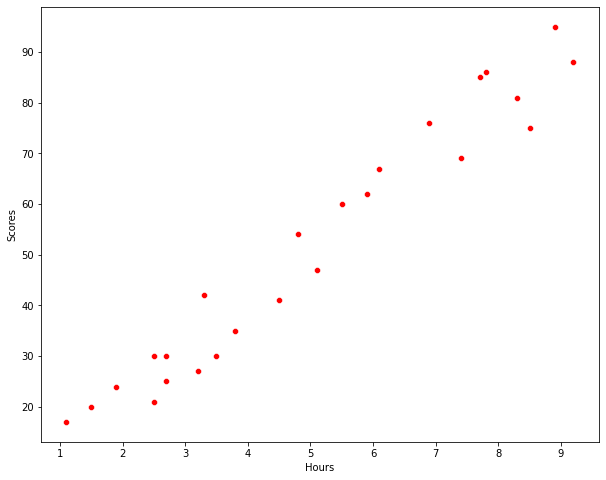

In [21]:
plt.figure(figsize = (10,8))
sns.scatterplot(data['Hours'],data['Scores'], color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Now, divide the dataset into a dependent and an independent variable, y and x respectively so that we can split the data into train and test set

In [22]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)   #split into training and test sets

Model fitting using Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  #creating an object of the regression equation
lr = regressor.fit(x_train,y_train)  #fitting the model

In [25]:
regressor.coef_  #this is the slope of the equation

array([9.68207815])

In [26]:
regressor.intercept_   #this is is the constant intercept

2.826892353899737

Plot the regression line on the trained data

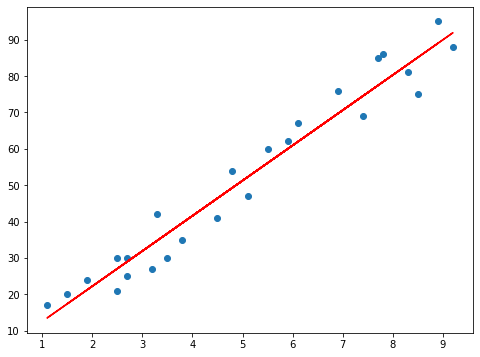

In [27]:
plt.figure(figsize = (8,6))
plt.scatter(x,y)
plt.plot(x,regressor.intercept_ + regressor.coef_*x, color = 'red')

We can see above how perfectly the model has been trained on training data

### Let us see the performance of the model on an unseen test dataset

In [28]:
predict = lr.predict(x_test)

In [29]:
predict

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

Make a data frame containing the actual and predicted data points

In [30]:
df = pd.DataFrame({'Actual':y_test,'Predicted':predict})

In [31]:
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### So we have the score and the predicted score on the basis of the study hours

We can prdict the score from a single observation. Let us try to know what is the score of the student who spends 9.25 hours studying.

In [33]:
score = regressor.predict([[9.25]])
print('Number of Hours = {}'.format(9.25))
print('Predicted Score = {}'.format(score[0]))

Number of Hours = 9.25
Predicted Score = 92.38611528261494


### 92.4 is the predicted score. In order to evaluate the performance through metrics, we can use MSE, MAE and R-square

In [34]:
print("MAE",mean_absolute_error(y_test,predict))

MAE 3.9207511902099244


In [35]:
print('R_Suared',r2_score(y_test,predict))

R_Suared 0.9678055545167994


## We have a good R-square of 96%